<a href="https://colab.research.google.com/github/maha022000/MAHALAKSHMI/blob/Data-science--projects/Logistic_Regression_You_are_given_a_categorical_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Problem Statement: Logistic Regression
You are given a categorical dataset – “Heart_Disease.csv.” Load the
dataset into a DataFrame. Considering the “TenYearCHD” column as the
target variable, perform the following tasks:

1. Explore the “Heart_Disease.csv” dataset, identify the null values and fill
them with the mean value of their respective columns
2. Split the data into test and train parts using train_test_split()
function in 80:20 ratio (80% train, 20% test)
3. Perform scaling of numeric data using the StandardScaler() function
4. Build a Logistic regression model using the test dataset and test the model
using the test dataset
5. Print the classification report of the model
6. Calculate the confusion matrix and plot the same using a heatmap
7. Calculate and print the accuracy score of the model
8. Print the decision boundary for θ = 0, θ = 1 and 2.


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
heart_df=pd.read_csv("Heart_Disease.csv")
heart_df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
heart_df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Identifying null values and filling them with mean of thier respective columns.

In [ ]:
heart_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
heart_df = heart_df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [ ]:
heart_df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

 Finding uniqueness in each column.

In [ ]:
#unique values
heart_df.nunique()/heart_df.shape[0]

male               0.000472
age                0.009202
education          0.001180
currentSmoker      0.000472
cigsPerDay         0.008023
BPMeds             0.000708
prevalentStroke    0.000472
prevalentHyp       0.000472
diabetes           0.000472
totChol            0.058754
sysBP              0.055215
diaBP              0.034450
BMI                0.321850
heartRate          0.017461
glucose            0.033978
TenYearCHD         0.000472
dtype: float64

 Importing libraries for logistic regression.

In [ ]:
## importing packages

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score
from sklearn.metrics import roc_curve , auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

 Defining input and output variable for test-train split

In [ ]:
## Defining variables X,y 
X= heart_df.drop("TenYearCHD",axis=1)
y=heart_df["TenYearCHD"]
print("Columns in X :",X.columns)
print("y :",y)
print("shape of X:",X.shape)
print("shape of y:",y.shape[0])

Columns in X : Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')
y : 0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64
shape of X: (4238, 15)
shape of y: 4238


Splitting the data into test-train parts in a 80:20 ratio.

In [ ]:
## Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
import sys
print("After splitting the data-")
print("size of input train data is:", sys.getsizeof(X_train))
print("sizeof input test data is:", sys.getsizeof(X_test))
print("size of output train data is:", sys.getsizeof(y_train))
print("size of output test data is:", sys.getsizeof(y_test))

After splitting the data-
size of input train data is: 433936
sizeof input test data is: 108560
size of output train data is: 54256
size of output test data is: 13584


 Scaling the data using StandardScalar() function.

In [ ]:
# Scaling the data 
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

 Training the model using logistic regression.

In [ ]:
# Training the model using Logistic Regression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

 Testing the model using test dataset.

In [ ]:
## Predicting data
y_pred=model.predict(X_test)

Printing the classification report.

In [ ]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       710
           1       0.82      0.07      0.12       138

    accuracy                           0.85       848
   macro avg       0.83      0.53      0.52       848
weighted avg       0.84      0.85      0.79       848



 Printing the confusion matrix.

In [ ]:
# confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
print("Confusion matrix is \n",conf_mat)

Confusion matrix is 
 [[708   2]
 [129   9]]


Text(42.0, 0.5, 'predicted label')

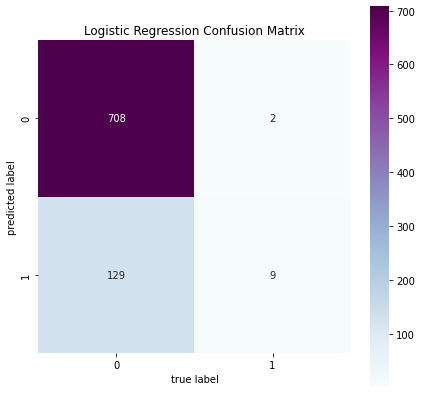

In [ ]:
# plotting confusion matrix
plt.figure(figsize=(7,7))
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(conf_mat, square=True,cmap="BuPu",annot=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')

 Printing accuracy score.

In [ ]:
# accuracy score
print("accuracy score : ",accuracy_score(y_test,y_pred))

# percentage accurate
print("accuracy:", round(100*accuracy_score(y_test,y_pred)),"%")

accuracy score :  0.8455188679245284
accuracy: 85 %


 Printing the decision boundry.

In [ ]:
#For theta_0:
print(model.intercept_ )
#For theta_1 and theta_2:
print(model.coef_ )

[-1.99450414]
[[ 0.21635451  0.52284324 -0.00373038  0.01763908  0.27002551  0.01692892
   0.08452846  0.16742972  0.054612    0.0912552   0.29073846 -0.09032936
   0.03575889 -0.01982821  0.12616453]]
